In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
master_df = pd.read_pickle('movie_master_dataset_with_inflation.pkl')

In [3]:
# master_df = master_df[master_df['worldwide_gross'] > 1e6]
master_df = master_df[master_df['worldwide_gross'] != 0]

# WORLDWIDE GROSS FOR TOP 3 GENRES

In [4]:
no_duplicates_df = master_df.drop_duplicates(subset=['movie','inf_adj_production_budget'])
all_3_genres = no_duplicates_df[(no_duplicates_df['Action'] == True) | (no_duplicates_df['Adventure'] == True) | 
                 (no_duplicates_df['Comedy'] == True)]['worldwide_gross'].sum()

overlaps = no_duplicates_df[((no_duplicates_df['Action'] == True) & (no_duplicates_df['Adventure'] == True)) 
                            | ((no_duplicates_df['Action'] == True) & (no_duplicates_df['Comedy'] == True)) 
                            | ((no_duplicates_df['Adventure'] == True) & (no_duplicates_df['Comedy'] == True))]


print("The sum of the worldwide gross of the top 3 genres is: " + str(all_3_genres.sum() - overlaps['worldwide_gross'].sum()))


The sum of the worldwide gross of the top 3 genres is: 59049756132


# Producing boxplots using the produce_boxplot function

Note: Must be using up-to-date Python3 for this to work. Do not use learn-env environment

In [5]:
def produce_boxplot(master, budgetmin, budgetmax=1e9, movie_count_thresh=100, ylim=(-1.5,30)):
    '''
    Produces a boxplot with inputs:
        master - the master dataframe as pandas df
        budgetmin - an int of the minimum movie budget for the data
        budgetmax - an int of the maximum movie budget for the data (default = 100)
        movie_count_thresh - the minimum number of movies per genre required for plotting (default = 100)
        ylim - the limits of the y axis a tuple -> (min, max)
        
    Returns None
    Spits out boxplots
    '''
    
    
    # df with no duplicates
    no_duplicates_df = master.drop_duplicates(subset=['movie','inf_adj_production_budget'])
    
    # list with all genre names
    genre_names = master_df.columns.tolist()[10:]
    # df with minimum budget and no duplicates
    budget_min_df = no_duplicates_df[(no_duplicates_df['inf_adj_production_budget'] >= budgetmin) & (no_duplicates_df['inf_adj_production_budget'] < budgetmax)]
    
    # creating list of genres where there are at least movie_count_thresh number of movies
    remaining_genres = []
    for genre in genre_names:
        if budget_min_df[genre].sum() > movie_count_thresh:
            remaining_genres.append(genre)
    
    # get list of column names and get list of total movies for that column
    col_names_desc = [names for counts, names in sorted(zip(budget_min_df[remaining_genres].sum().values.tolist(), 
                                               budget_min_df[remaining_genres].sum().index.tolist()), reverse=True)]
    col_counts_desc = [counts for counts, names in sorted(zip(budget_min_df[remaining_genres].sum().values.tolist(), 
                                               budget_min_df[remaining_genres].sum().index.tolist()), reverse=True)]
    
    # labels for x axis
    plt_x_labels = [ str(x) + ' - ' + str(y) for x, y in zip(col_names_desc, col_counts_desc)]
    
    # THE PLOT
    fig, ax = plt.subplots(figsize=(12,7))
    ax.boxplot([budget_min_df[budget_min_df[col] == True]['ROI'] for col in col_names_desc], 
           labels=plt_x_labels)
    ax.set_ylim(ylim)
    ax.set_title('ROI Boxplot for Genres with Budget \$' + format(int(budgetmin), ',') + ' to \$' + format(int(budgetmax), ','))
    ax.set_ylabel('ROI')
    ax.set_xlabel('Genre')
    plt.xticks(fontsize=12, rotation=90)
    plt.show()

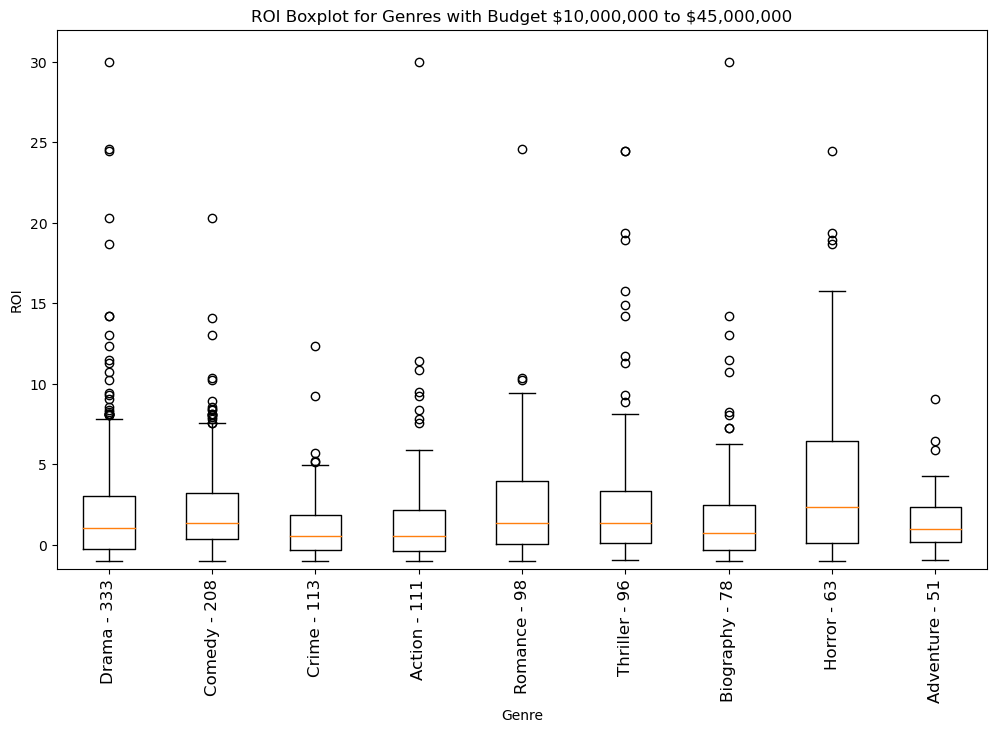

In [6]:
produce_boxplot(master_df, 1e7, 4.5e7, 50, (-1.5, 32))

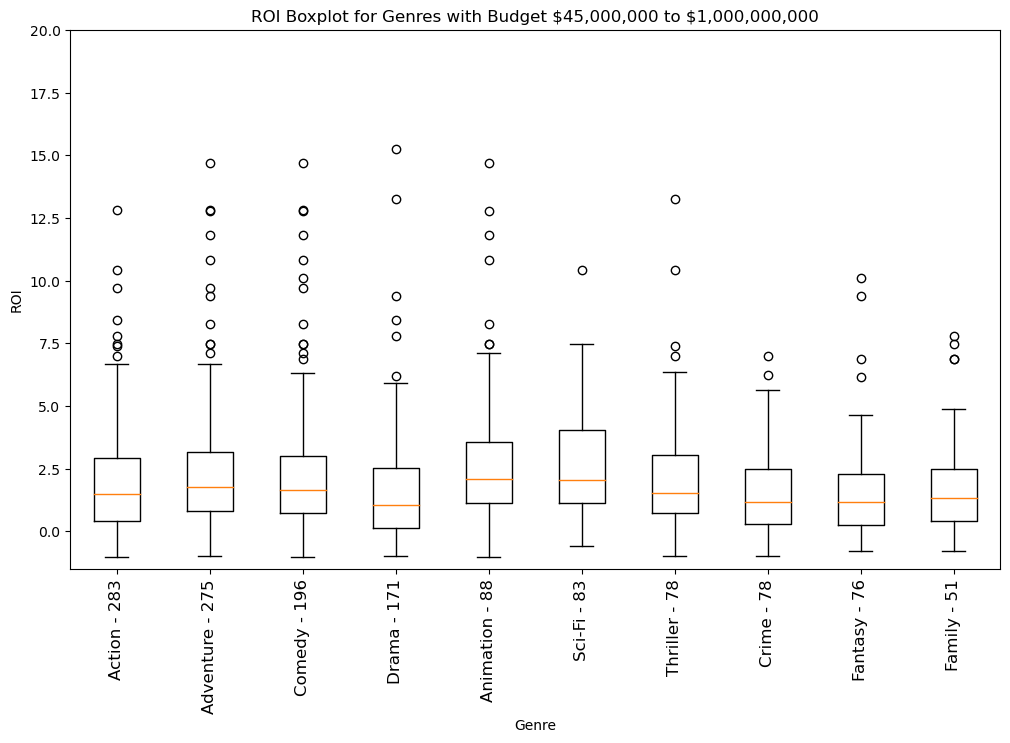

In [7]:
produce_boxplot(master_df, 4.5e7, 1e9, 50, (-1.5,20))

In [8]:
custom_palette = sns.color_palette("YlGn", 3)
total_gross_per_genre = pd.DataFrame({'genre':x_axis, 'total_worldwide_gross':y_axis})
sns.barplot(data=total_gross_per_genre.iloc[:10], x = 'genre', y='total_worldwide_gross', color='black')

NameError: name 'x_axis' is not defined

In [ ]:
sns.scatterplot(data=no_duplicates_df[(no_duplicates_df['inf_adj_production_budget'] >=4.5e7) & 
                                      (no_duplicates_df['Action'] == True)], x='inf_adj_production_budget', y='ROI')


print(no_duplicates_df[(no_duplicates_df['inf_adj_production_budget'] > 4.5e7) & (no_duplicates_df['Drama'] == True)]
      [['inf_adj_production_budget', 'ROI']].corr(method='pearson'))


### Old boxplot function without the limits

In [ ]:
def produce_boxplot(master, budget, movie_count_thresh=100, ylim=(-1.5,30)):
    '''
    Produces a boxplot with inputs:
        master - the master dataframe as pandas df
        budget - an int of the minimum movie budget for the data
        movie_count_thresh - the minimum number of movies per genre required for plotting
        ylim - the limits of the y axis a tuple -> (min, max)
        
    Returns None
    Spits out boxplots
    '''
    
    
    # df with no duplicated
    no_duplicates_df = master.drop_duplicates(subset=['movie','inf_adj_production_budget'])
    
    # list with all genre names
    genre_names = master_df.columns.tolist()[10:]

    # df with minimum budget and no duplicates
    budget_min_df = no_duplicates_df[no_duplicates_df['inf_adj_production_budget'] > budget]
    
    # creating list of genres where there are at least movie_count_thresh number of movies
    remaining_genres = []
    for genre in genre_names:
        if budget_min_df[genre].sum() > movie_count_thresh:
            remaining_genres.append(genre)
    
    # get list of column names and get list of total movies for that column
    col_names_desc = [names for counts, names in sorted(zip(budget_min_df[remaining_genres].sum().values.tolist(), 
                                               budget_min_df[remaining_genres].sum().index.tolist()), reverse=True)]
    col_counts_desc = [counts for counts, names in sorted(zip(budget_min_df[remaining_genres].sum().values.tolist(), 
                                               budget_min_df[remaining_genres].sum().index.tolist()), reverse=True)]
    
    # labels for x axis
    plt_x_labels = [ str(x) + ' - ' + str(y) for x, y in zip(col_names_desc, col_counts_desc)]
    
    # THE PLOT
    fig, ax = plt.subplots(figsize=(12,7))
    ax.boxplot([budget_min_df[budget_min_df[col] == True]['ROI'] for col in col_names_desc], 
           labels=plt_x_labels)
    ax.set_ylim(ylim)
    ax.set_title('Budget > ' + format(int(budget), ',') + ' Million ROI for each genre boxplot')
    ax.set_ylabel('ROI')
    ax.set_xlabel('Genre')
    plt.xticks(fontsize=12, rotation=90)
    plt.show()

Old code that was used for getting the genre and budget columns for a barchart

In [ ]:
no_duplicates_df = master_df.drop_duplicates(subset=['movie','inf_adj_production_budget'])
genre_names = no_duplicates_df.columns.tolist()[10:]

genre_vals = []


for g in genre_names:
    genre_vals.append(no_duplicates_df[no_duplicates_df[g] == True]['worldwide_gross'].sum())

x_axis = []
y_axis = []

for val, name in sorted(zip(genre_vals, genre_names), reverse=True):
    x_axis.append(name)
    y_axis.append(val)

# x_axis, y_axis